# step 1 : Business understanding and define problem

Banking domain and credit card business.
Problem statement : Segmentation of customers to define market strategy

# step 2 : Coverting to AI problem and approach

Unsupervised learning model need to be developed to segment the customers with similarities.
Data checks & treatment--Underlying relation in the data--statistical tests--Identifying the correct variables----Data preparation--Model building--Model evaluation

# step 3 : Data gathering and understanding

Data provided. Understanding few columns like balance and banlance_freq(col 2 & 3) is unclear

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load  data as df

df= pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Step 4 : Data preparation

All the features are in a single csv file .No data prep required

# Step 5 : Data cleaning
    
Duplicates, outliers,missing value treatment, data validity check

In [4]:
df.shape

(8950, 18)

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.drop_duplicates()
#No duplicates found

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
df.isnull().sum()

#Missing values identified in credit limit and minimum payments

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
#drop the missing value rows for time being
df=df.dropna()

In [10]:
#doubtful on treating outliers for clustering

In [11]:
q1=0
q3=0
IQR=0
lower_bound=0
upper_bound=0
q1=df["PURCHASES"].quantile(0.25)
q3=df["PURCHASES"].quantile(0.75)
IQR= q3-q1
lower_bound= q1- (1.5* IQR)
upper_bound= q3+ (1.5* IQR)

In [12]:
lower_bound,upper_bound

(-1610.5512499999998, 2799.89875)

Lower bound and upper bound seems doubtful, so outliers are not removed.

# Step 7 : EDA

Univariant analysis
Bi-variant analysis
Corelation matrix,Pivots
Visualization and data insights


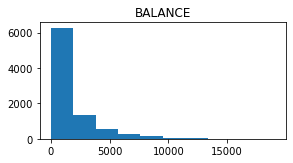

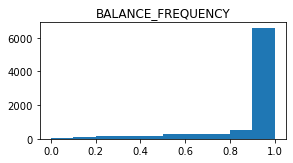

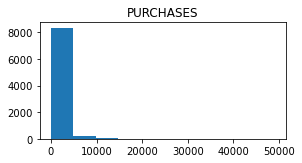

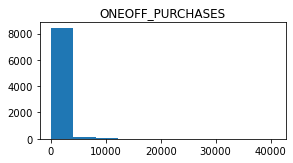

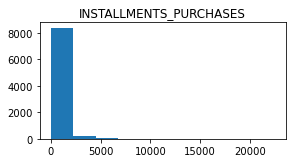

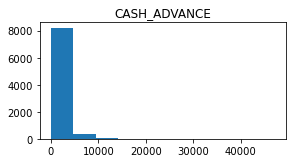

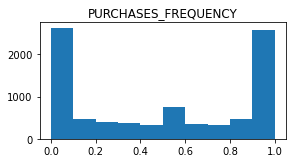

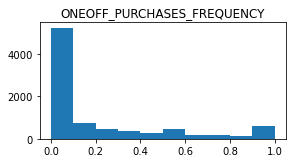

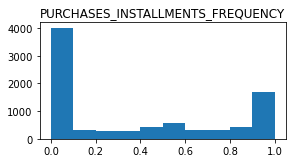

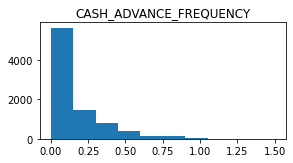

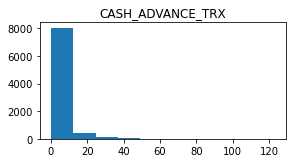

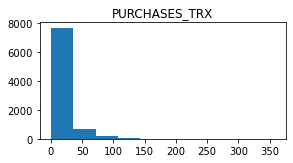

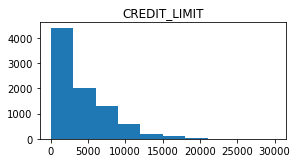

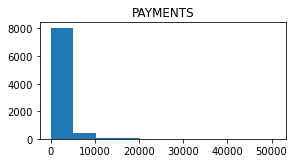

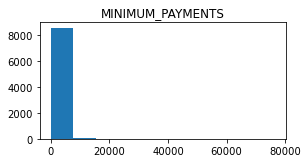

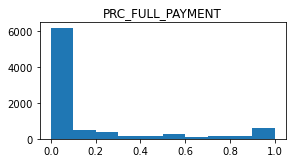

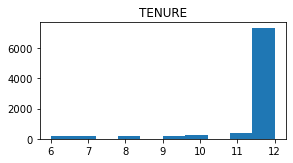

In [13]:
#Univariant analysis for each column
for i in df.columns[1:]:
    plt.subplots(figsize=(15, 15))
    
    j=1
    plt.subplot(6,3,j)
    
    plt.hist(df[i])
    plt.title(i)
    j=+1

#understanding from univariant analysis
1. Most of the customers(close to 60%) have balance of 0-1500 range
3. More than 90% of the customers Puchase amount spent from last 12 months is with in the range of 0-5,000
4. More than 90% of the customers have Avrage Totalamount spend by oneff purchases is below the range of 2500
5. ................

#Bi-variant analysis
	Monthly average purchase and cash advance amount
•	Purchases by type (one-off, installments)
•	Average amount per purchase and cash advance transaction,
•	Limit usage (balance to credit limit ratio),
•	Payments to minimum payments ratio etc.
•	Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
•	Identification of the relationships/ affinities between services.

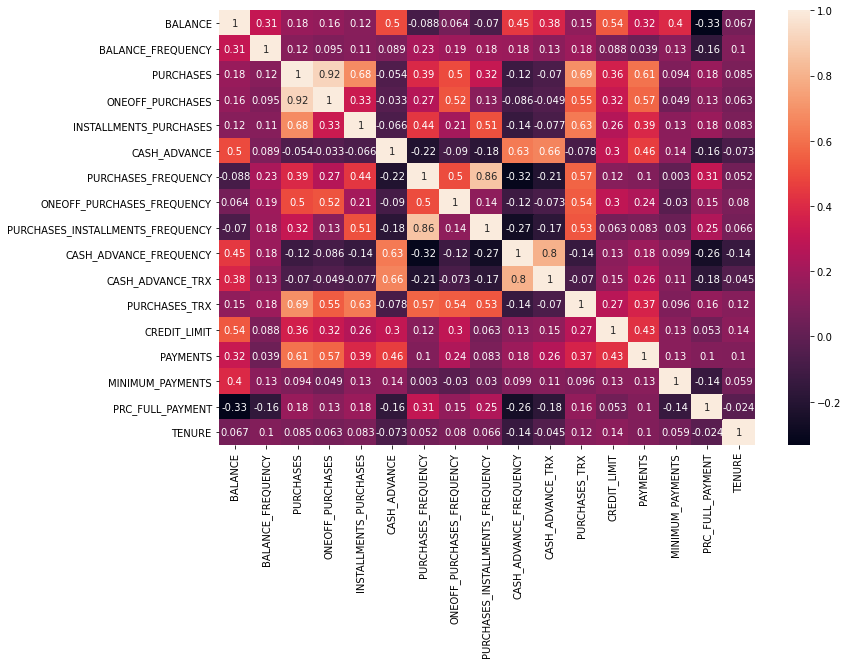

In [14]:
plt.figure(figsize=(12, 8))
df_corr=df.corr()

sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

<Figure size 1008x1008 with 0 Axes>

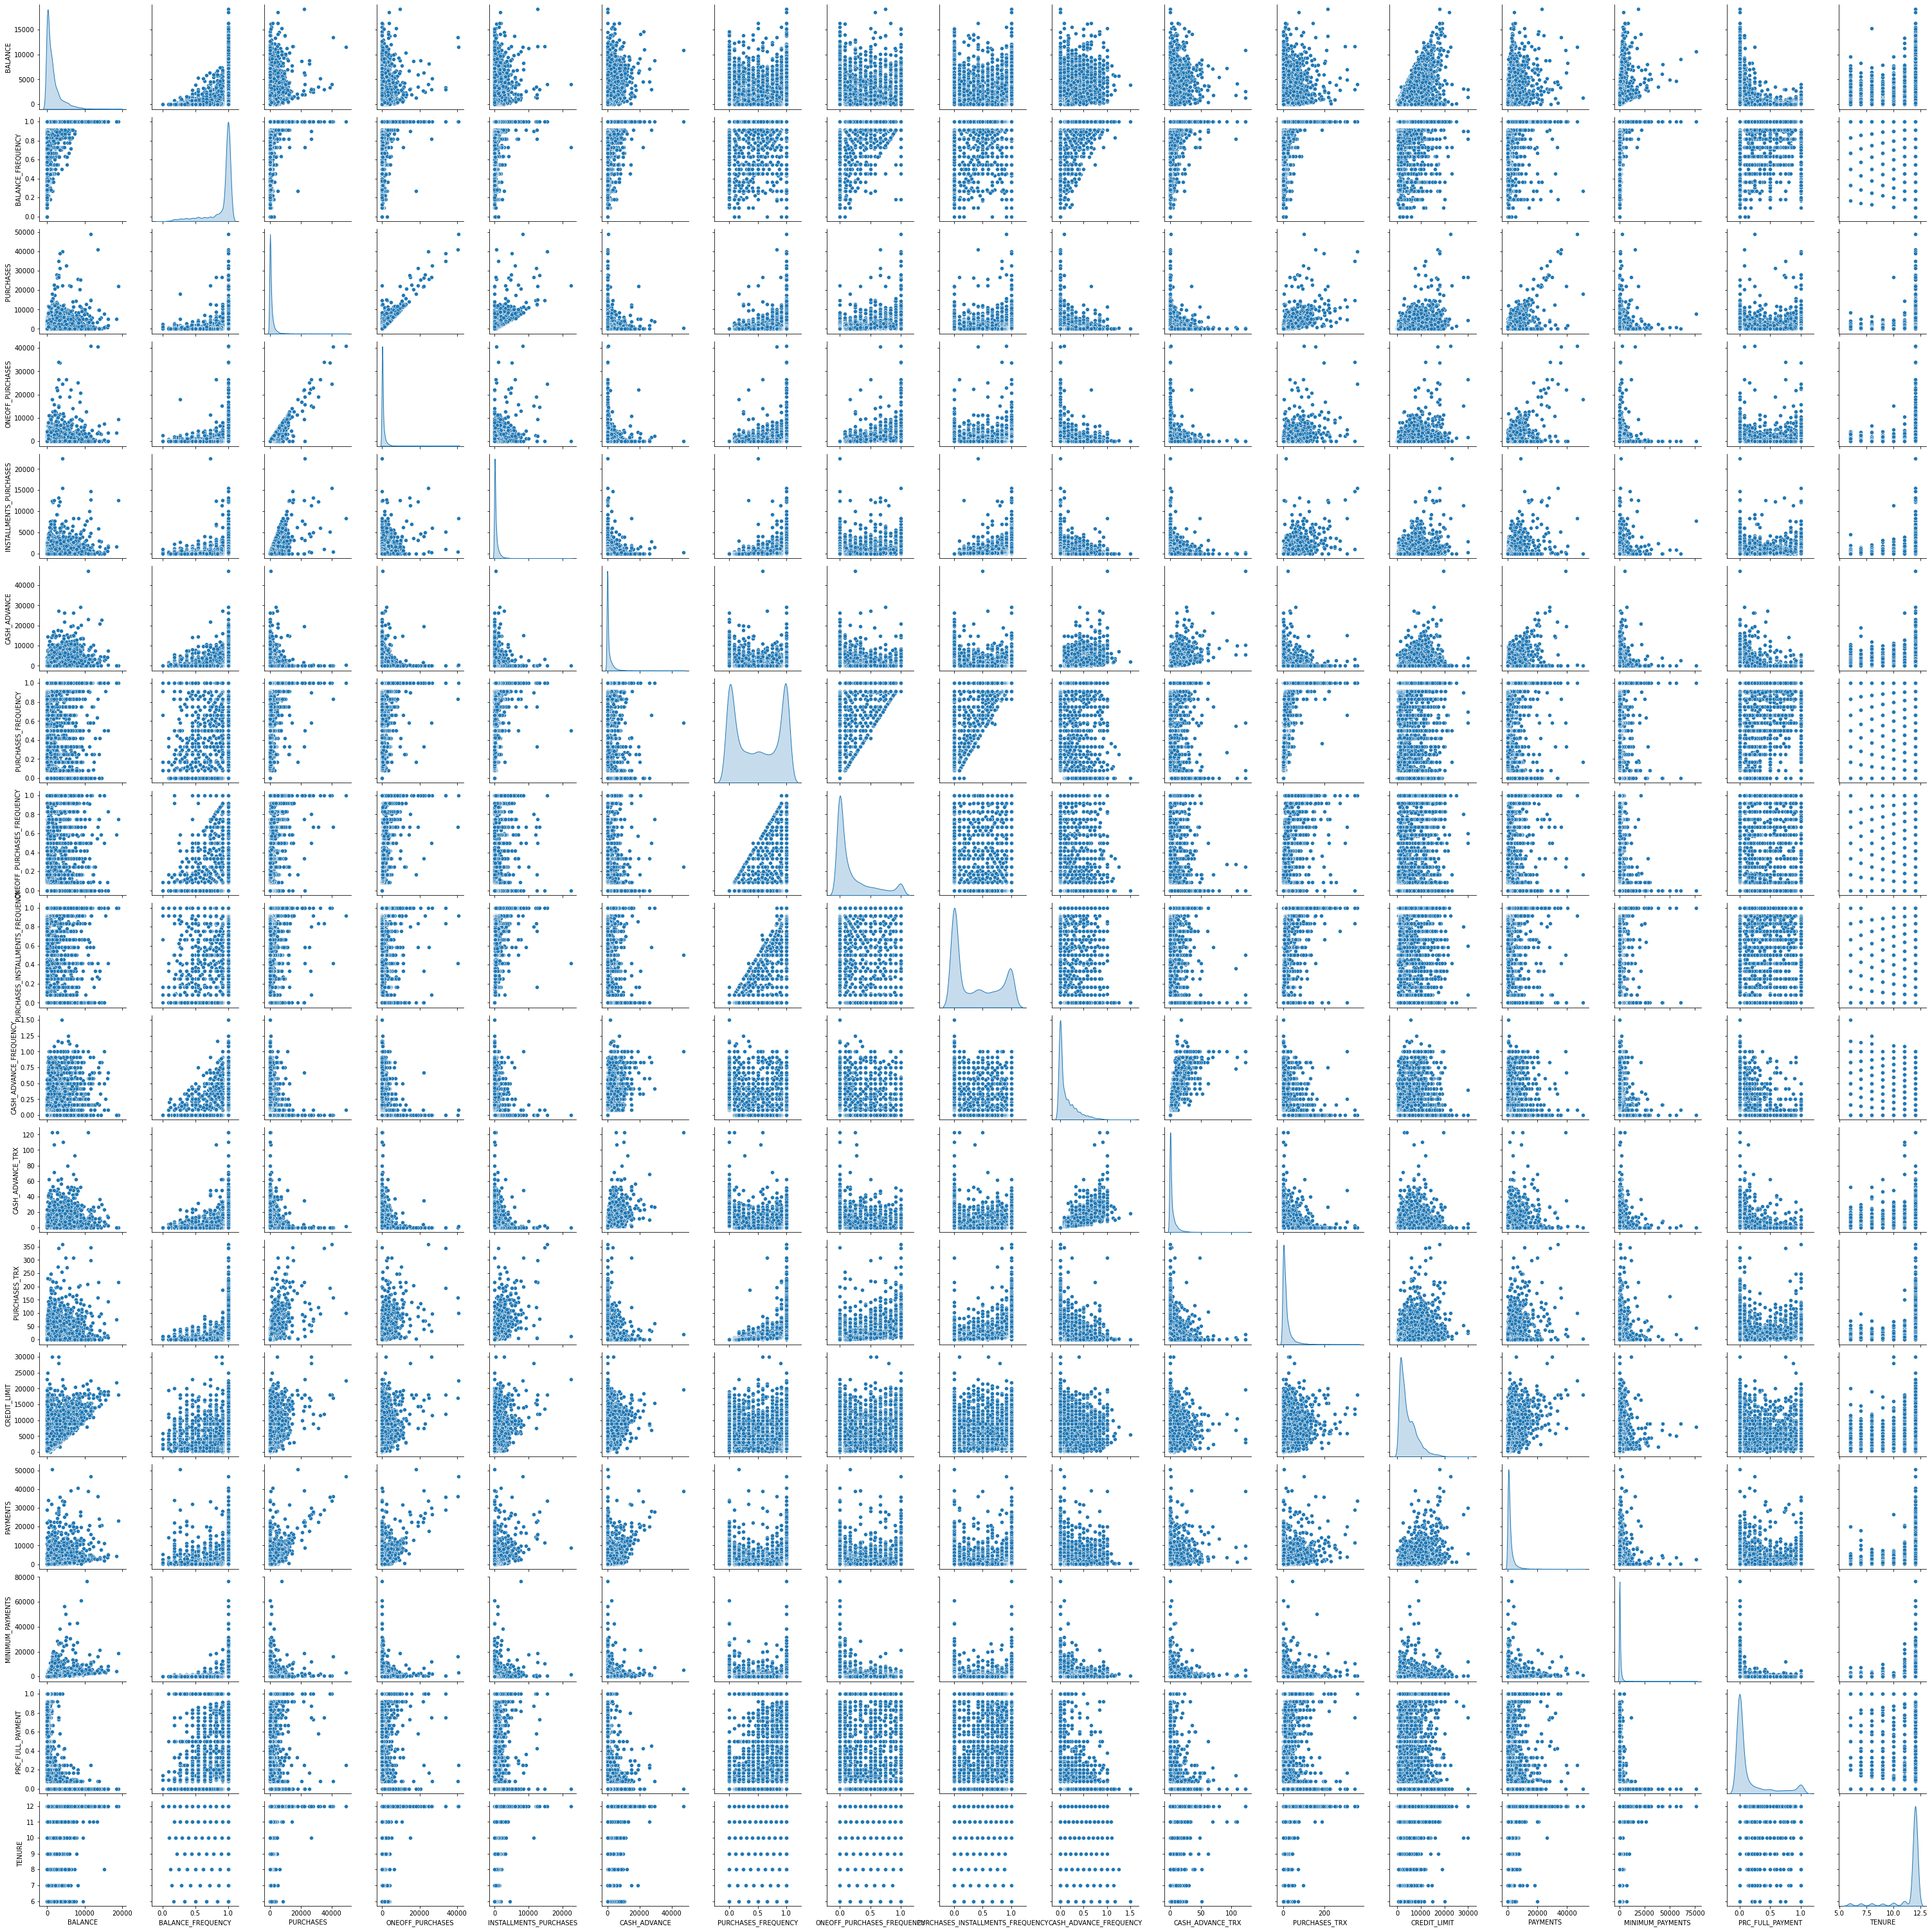

In [15]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

In [16]:
#Analyzing the results ??

# Step 8: Feature engineering and selection

In [17]:
#Importent features need to be selected ??
list1=df.columns
list1

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [18]:
df_new=df[["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS","TENURE"]]

In [19]:
df_new.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
0,40.900749,95.40,0.00,95.40,0.000000,1000.0,201.802084,12
1,3202.467416,0.00,0.00,0.00,6442.945483,7000.0,4103.032597,12
2,2495.148862,773.17,773.17,0.00,0.000000,7500.0,622.066742,12
4,817.714335,16.00,16.00,0.00,0.000000,1200.0,678.334763,12
5,1809.828751,1333.28,0.00,1333.28,0.000000,1800.0,1400.057770,12


In [20]:
list2=pd.Series(df_new.columns)

# Step 9 : Data standardization/Normalization

In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
scale=Normalizer()
df_new_scaled=scale.fit_transform(df_new)

In [23]:
df_new_scaled

array([[0.0397124 , 0.0926282 , 0.        , ..., 0.97094551, 0.19593883,
        0.01165135],
       [0.29530901, 0.        , 0.        , ..., 0.64549074, 0.37835279,
        0.00110656],
       [0.31175125, 0.09660214, 0.09660214, ..., 0.9370721 , 0.07772285,
        0.00149932],
       ...,
       [0.02284683, 0.14099444, 0.        , ..., 0.97641578, 0.07935407,
        0.00585849],
       [0.02668581, 0.        , 0.        , ..., 0.99147984, 0.10420445,
        0.01189776],
       [0.18659987, 0.54734609, 0.54734609, ..., 0.6007915 , 0.03162437,
        0.00300396]])

In [24]:
df_new_scaled=pd.DataFrame(df_new_scaled)

In [25]:
df_new_scaled.head()

,0,1,2,3,4,5,6,7
0,0.039712,0.092628,0.000000,0.092628,0.000000,0.970946,0.195939,0.011651
1,0.295309,0.000000,0.000000,0.000000,0.594123,0.645491,0.378353,0.001107
2,0.311751,0.096602,0.096602,0.000000,0.000000,0.937072,0.077723,0.001499
3,0.510131,0.009982,0.009982,0.000000,0.000000,0.748619,0.423179,0.007486
4,0.521778,0.384388,0.000000,0.384388,0.000000,0.518944,0.403640,0.003460


In [26]:
df_new_scaled.columns=list2

In [27]:
df_new_scaled.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
0,0.039712,0.092628,0.000000,0.092628,0.000000,0.970946,0.195939,0.011651
1,0.295309,0.000000,0.000000,0.000000,0.594123,0.645491,0.378353,0.001107
2,0.311751,0.096602,0.096602,0.000000,0.000000,0.937072,0.077723,0.001499
3,0.510131,0.009982,0.009982,0.000000,0.000000,0.748619,0.423179,0.007486
4,0.521778,0.384388,0.000000,0.384388,0.000000,0.518944,0.403640,0.003460


# Step 10 : Determining number of clusters using elbow method

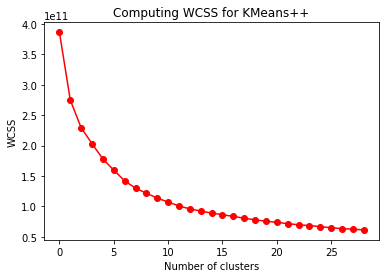

In [28]:
df_2=df.iloc[:,1:].values
from sklearn.cluster import KMeans

wcss = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df_2 )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
#taking k= 6 from above graph

# Step 11 : Running the model giving number of clusters obtained from step 8

In [30]:
km = KMeans(n_clusters=6, random_state=123)
km.fit(df_new_scaled)

KMeans(n_clusters=6, random_state=123)

In [31]:
pd.Series(km.labels_).value_counts()

5    2931
3    1832
1    1167
2    1001
4     902
0     803
dtype: int64

In [32]:
cluster=pd.Series(km.labels_)

In [33]:
df_new_scaled["Cluster"]=cluster

In [34]:
df_new_scaled.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE,Cluster
0,0.039712,0.092628,0.000000,0.092628,0.000000,0.970946,0.195939,0.011651,5
1,0.295309,0.000000,0.000000,0.000000,0.594123,0.645491,0.378353,0.001107,1
2,0.311751,0.096602,0.096602,0.000000,0.000000,0.937072,0.077723,0.001499,5
3,0.510131,0.009982,0.009982,0.000000,0.000000,0.748619,0.423179,0.007486,3
4,0.521778,0.384388,0.000000,0.384388,0.000000,0.518944,0.403640,0.003460,0


# Step 12 : Applying PCA for dimensionality reduction

In [35]:
from sklearn.decomposition import PCA


In [36]:
pca=PCA(n_components=2,whiten=2).fit(df_new_scaled)
scaled_pca=pca.transform(df_new_scaled)

In [37]:
df_scaled_pca=pd.DataFrame(scaled_pca)

In [38]:
df_scaled_pca.head()

,0,1
0,-1.104439,-0.006524
1,1.242551,-0.728451
2,-1.099870,-0.620937
3,0.072394,-0.438572
4,1.814577,0.843668


In [39]:
df_scaled_pca.columns=["PCA1","PCA2"]

In [40]:
df_scaled_pca.head()

,PCA1,PCA2
0,-1.104439,-0.006524
1,1.242551,-0.728451
2,-1.099870,-0.620937
3,0.072394,-0.438572
4,1.814577,0.843668


In [41]:
df_new_scaled["PCA1"]=df_scaled_pca["PCA1"]
df_new_scaled["PCA2"]=df_scaled_pca["PCA2"]

In [42]:
df_new_scaled.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE,Cluster,PCA1,PCA2
0,0.039712,0.092628,0.000000,0.092628,0.000000,0.970946,0.195939,0.011651,5,-1.104439,-0.006524
1,0.295309,0.000000,0.000000,0.000000,0.594123,0.645491,0.378353,0.001107,1,1.242551,-0.728451
2,0.311751,0.096602,0.096602,0.000000,0.000000,0.937072,0.077723,0.001499,5,-1.099870,-0.620937
3,0.510131,0.009982,0.009982,0.000000,0.000000,0.748619,0.423179,0.007486,3,0.072394,-0.438572
4,0.521778,0.384388,0.000000,0.384388,0.000000,0.518944,0.403640,0.003460,0,1.814577,0.843668


sns.catplot(x="PCA1", y="PCA2", hue="Cluster",
            kind="swarm", data=df_new_scaled)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

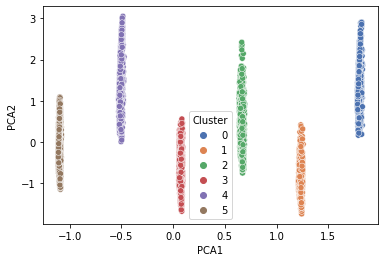

In [43]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="deep",data=df_new_scaled)